##  Bank Loan Default Prediction


## Project Overview

You are given customer demographic and financial information such 
. income
. age
. credict score
. employment type
. loan amount

## Parameters


age – Customer age (21–65)

gender – Male/Female

income – Annual income in USD (20k–150k)

employment_type – Salaried, Self-Employed, Unemployed

credit_score – Credit score (300–850)

loan_amount – Loan requested (1k–50k USD)

loan_term – 12, 24, 36, 48, 60 months

default – Target variable (Yes/No)

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Set Loading

In [4]:
data = pd.read_csv(r'C:\Users\dihna\Downloads\loan_default.csv')
data

,age,gender,income,employment_type,credit_score,loan_amount,loan_term,default
0,59,Male,28717,Self-Employed,313,34453,48,Yes
1,49,Male,147449,Self-Employed,803,19544,12,No
2,35,Female,48699,Salaried,530,13258,36,Yes
3,63,Female,93686,Salaried,383,31841,48,No
4,28,Male,87661,Salaried,429,49758,24,Yes
...,...,...,...,...,...,...,...,...
495,33,Male,146944,Salaried,787,1155,24,No
496,32,Male,132726,Self-Employed,423,2958,24,No
497,51,Male,101974,Salaried,713,11693,60,No
498,22,Female,125947,Salaried,471,40112,48,No


In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,500.0,43.536,13.026130,21.0,32.00,45.0,54.25,65.0
income,500.0,84338.774,39718.152211,20077.0,47888.00,85375.5,120509.00,149948.0
credit_score,500.0,577.446,154.929175,300.0,446.75,584.0,713.00,849.0
loan_amount,500.0,24270.928,14018.820235,1097.0,12298.00,23659.5,35565.00,49998.0
loan_term,500.0,36.672,17.109702,12.0,24.00,36.0,48.00,60.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              500 non-null    int64 
 1   gender           500 non-null    object
 2   income           500 non-null    int64 
 3   employment_type  500 non-null    object
 4   credit_score     500 non-null    int64 
 5   loan_amount      500 non-null    int64 
 6   loan_term        500 non-null    int64 
 7   default          500 non-null    object
dtypes: int64(5), object(3)
memory usage: 31.4+ KB


In [8]:
data.columns

Index(['age', 'gender', 'income', 'employment_type', 'credit_score',
       'loan_amount', 'loan_term', 'default'],
      dtype='object')

In [9]:
data.isna().sum()

age                0
gender             0
income             0
employment_type    0
credit_score       0
loan_amount        0
loan_term          0
default            0
dtype: int64

# loading 1st five datasets

In [10]:
data.head()

,age,gender,income,employment_type,credit_score,loan_amount,loan_term,default
0,59,Male,28717,Self-Employed,313,34453,48,Yes
1,49,Male,147449,Self-Employed,803,19544,12,No
2,35,Female,48699,Salaried,530,13258,36,Yes
3,63,Female,93686,Salaried,383,31841,48,No
4,28,Male,87661,Salaried,429,49758,24,Yes


# Data Visualization

Histogram

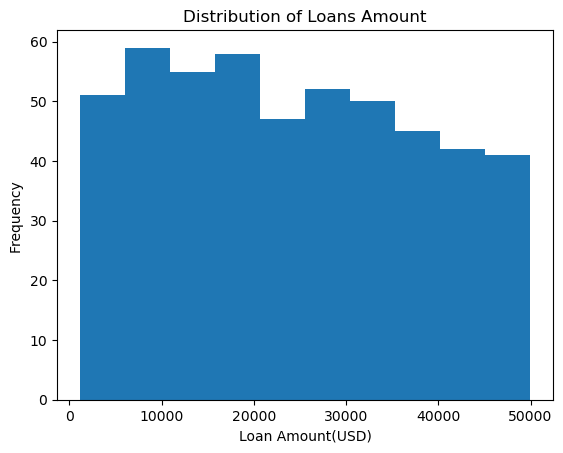

In [11]:
plt.hist(data['loan_amount'])
plt.title('Distribution of Loans Amount')
plt.xlabel('Loan Amount(USD)')
plt.ylabel('Frequency ')
plt.show()

# Average income of defaulters vs non-defaulters.

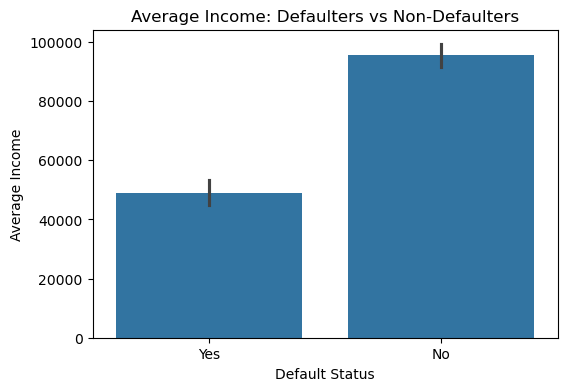

In [15]:
plt.figure(figsize=(6,4))
sns.barplot(data=data, x="default", y="income")

plt.title("Average Income: Defaulters vs Non-Defaulters")
plt.xlabel("Default Status")
plt.ylabel("Average Income")
plt.show()

# Relationship between credit score and default (bar chart).

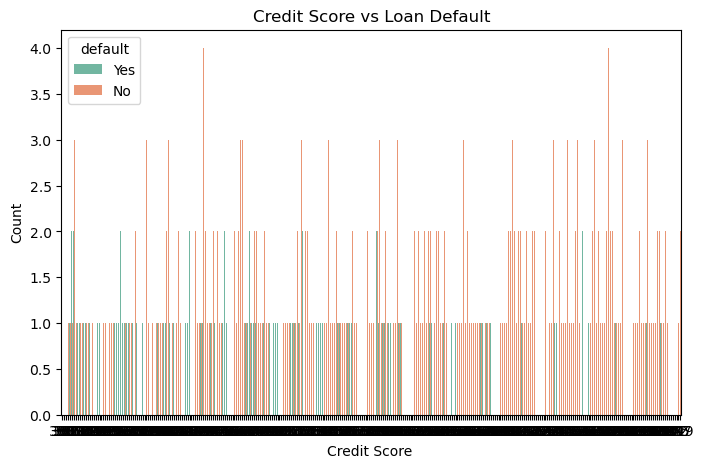

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x="credit_score", hue="default", palette="Set2")
plt.title("Credit Score vs Loan Default")
plt.xlabel("Credit Score ")
plt.ylabel("Count")
plt.show()

# Part B

In [79]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['employment_type'] = le.fit_transform(data['employment_type'])

In [80]:
from sklearn.preprocessing import StandardScaler

# Select features to scale
cols_to_scale = ["income", "credit_score", "loan_amount"]

scaler = StandardScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

print(data[cols_to_scale].head())


     income  credit_score  loan_amount
0 -1.401814     -1.708593     0.727042
1  1.590543      1.457310    -0.337522
2 -0.898216     -0.306550    -0.786368
3  0.235575     -1.256321     0.540534
4  0.083729     -0.959114     1.819882


In [81]:
data

,age,gender,income,employment_type,credit_score,loan_amount,loan_term,default,employment_type_encoded
0,59,1,-1.401814,1,-1.708593,0.727042,48,Yes,1
1,49,1,1.590543,1,1.457310,-0.337522,12,No,1
2,35,0,-0.898216,0,-0.306550,-0.786368,36,Yes,0
3,63,0,0.235575,0,-1.256321,0.540534,48,No,0
4,28,1,0.083729,0,-0.959114,1.819882,24,Yes,0
...,...,...,...,...,...,...,...,...,...
495,33,1,1.577816,0,1.353934,-1.650572,24,No,0
496,32,1,1.219485,1,-0.997880,-1.521831,24,No,1
497,51,1,0.444454,0,0.875818,-0.898116,60,No,0
498,22,0,1.048636,0,-0.687750,1.131118,48,No,0


# Definine Target variable

In [82]:
x=data.drop("default", axis=1) 
y=data["default"]

In [83]:
x

,age,gender,income,employment_type,credit_score,loan_amount,loan_term,employment_type_encoded
0,59,1,-1.401814,1,-1.708593,0.727042,48,1
1,49,1,1.590543,1,1.457310,-0.337522,12,1
2,35,0,-0.898216,0,-0.306550,-0.786368,36,0
3,63,0,0.235575,0,-1.256321,0.540534,48,0
4,28,1,0.083729,0,-0.959114,1.819882,24,0
...,...,...,...,...,...,...,...,...
495,33,1,1.577816,0,1.353934,-1.650572,24,0
496,32,1,1.219485,1,-0.997880,-1.521831,24,1
497,51,1,0.444454,0,0.875818,-0.898116,60,0
498,22,0,1.048636,0,-0.687750,1.131118,48,0


In [84]:
y

0      Yes
1       No
2      Yes
3       No
4      Yes
      ... 
495     No
496     No
497     No
498     No
499     No
Name: default, Length: 500, dtype: object

# Predictive Modeling (Decision Tree)

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
random_forest=RandomForestClassifier(n_estimators=100,random_state=42)
random_forest.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [90]:
y_pred=random_forest.predict(x_test)

In [91]:
from sklearn.metrics import accuracy_score, classification_report

In [92]:
cls_rep=classification_report(y_test,y_pred)
print('\n Classification Report: \n',cls_rep)


 Classification Report: 
               precision    recall  f1-score   support

          No       0.88      0.90      0.89        79
         Yes       0.58      0.52      0.55        21

    accuracy                           0.82       100
   macro avg       0.73      0.71      0.72       100
weighted avg       0.81      0.82      0.82       100



In [93]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['employment_type'] = le.fit_transform(data['employment_type'])

income                     0.364873
credit_score               0.230739
loan_amount                0.144090
age                        0.112716
loan_term                  0.070111
employment_type            0.029178
employment_type_encoded    0.025006
gender                     0.023288
dtype: float64


<Axes: title={'center': 'Feature\xa0Importance'}>

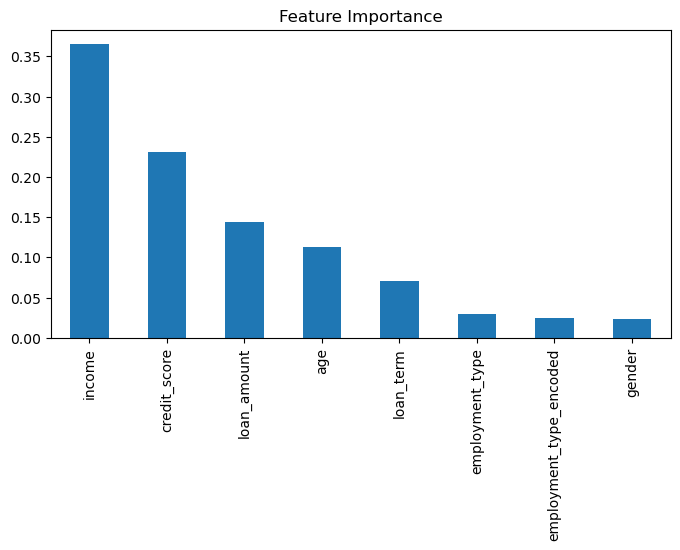

In [96]:
importances = pd.Series(random_forest.feature_importances_, index=x.columns)

importances = importances.sort_values(ascending=False)
print(importances)

importances.plot(kind='bar', figsize=(8,4), title='Feature Importance')